# 0.Getting setup

In [ ]:
try:
  import torch
  import torchvision
  assert int(torch.__version__.split('.')[0]) >= 2.0  #torch version should be 2.0 +
  assert int(torchvision.__version__.split('.')[1])>= 13 #torchvision version should be 0.16 +
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")
  """
  Here we r checking packages versions, and we will download specific versions of packages.
  """
except:
  print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
  !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
  import torch
  import torchvision
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")

torch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


In [ ]:
import torch
import torchvision

try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

In [ ]:
try:
  from going_modular import data_setup, engine
except:
  # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mahireddy1318/udemy_pytorch_tutorials



    from udemy_pytorch_tutorials.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'udemy_pytorch_tutorials'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 329 (delta 2), reused 325 (delta 1), pack-reused 0
Receiving objects: 100% (329/329), 34.00 MiB | 28.37 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import torch
device = 'cuda'  if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:

!nvidia-smi

Fri Dec 15 11:59:40 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
train_dir = '/content/udemy_pytorch_tutorials/data/pizza_steak_sushi/train'
test_dir = '/content/udemy_pytorch_tutorials/data/pizza_steak_sushi/test'
train_dir, test_dir

('/content/udemy_pytorch_tutorials/data/pizza_steak_sushi/train',
 '/content/udemy_pytorch_tutorials/data/pizza_steak_sushi/test')

# 2. Create Datasets and DataLoaders

## 2.1 Creating a transform for torchvision.models (manual creation)

In [ ]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
from torchvision import transforms
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [ ]:
from udemy_pytorch_tutorials.going_modular import data_setup

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir,
                              test_dir,
                              transform= manual_transforms ,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x78b9e8527550>,
 ['pizza', 'steak', 'sushi'])

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

## 2.2 Creating a transform for torchvision.models (auto creation)

In [ ]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
weights = EfficientNet_B1_Weights.DEFAULT
weights

EfficientNet_B1_Weights.IMAGENET1K_V2

In [ ]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[240]
    resize_size=[255]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir,
                              test_dir,
                              transform= manual_transforms ,
                              batch_size=BATCH_SIZE)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x78b9e8526ad0>,
 ['pizza', 'steak', 'sushi'])

# 3. Getting a pretrained model

In [ ]:
#old way to setup model with pre-trained weights.
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
model = efficientnet_b0(pretrained = True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 142MB/s]


RuntimeError: ignored

In [ ]:
# #present way to access pre traineed weights
weights = EfficientNet_B0_Weights.DEFAULT
weights
model = efficientnet_b0(weights=weights)
model


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 144MB/s]


RuntimeError: ignored

In [ ]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
weights = EfficientNet_B1_Weights.DEFAULT
weights
model = efficientnet_b1(weights=weights)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-c27df63c.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 155MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

### 3.3 Getting a summary of our model with torchinfo.summary()

In [ ]:

summary(model=model,
        input_size=(1, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [ ]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:

summary(model=model,
        input_size=(1, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)
print(output_shape)
# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

3


In [ ]:
summary(model=model,
        input_size=(1, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width = 20,
        row_settings = ['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

## model training

In [ ]:
from udemy_pytorch_tutorials.going_modular import engine
from torch import nn

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 10

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=EPOCHS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0675 | train_acc: 0.5391 | test_loss: 0.9913 | test_acc: 0.7235
Epoch: 2 | train_loss: 0.9406 | train_acc: 0.7109 | test_loss: 0.9386 | test_acc: 0.7443
Epoch: 3 | train_loss: 0.8566 | train_acc: 0.8594 | test_loss: 0.8468 | test_acc: 0.8475
Epoch: 4 | train_loss: 0.8440 | train_acc: 0.7578 | test_loss: 0.7715 | test_acc: 0.9280
Epoch: 5 | train_loss: 0.7215 | train_acc: 0.7656 | test_loss: 0.7288 | test_acc: 0.8674
Epoch: 6 | train_loss: 0.6664 | train_acc: 0.9375 | test_loss: 0.6673 | test_acc: 0.9081
Epoch: 7 | train_loss: 0.6495 | train_acc: 0.9219 | test_loss: 0.6412 | test_acc: 0.8977
Epoch: 8 | train_loss: 0.6290 | train_acc: 0.7812 | test_loss: 0.6040 | test_acc: 0.8873
Epoch: 9 | train_loss: 0.6355 | train_acc: 0.8008 | test_loss: 0.5748 | test_acc: 0.9384
Epoch: 10 | train_loss: 0.5557 | train_acc: 0.9023 | test_loss: 0.5214 | test_acc: 0.9489
[INFO] Total training time: 19.439 seconds


## 5. Evaluate model by plotting loss curves

In [ ]:
import requests
try:
  from helper_functions import plot_loss_curves
except:
  print("[INFO] Couldn't find helper_functions.py, downloading...")
  with open('helper_functions.py' , 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/helper_functions.py')
    f.write(request.content)



[INFO] Couldn't find helper_functions.py, downloading...


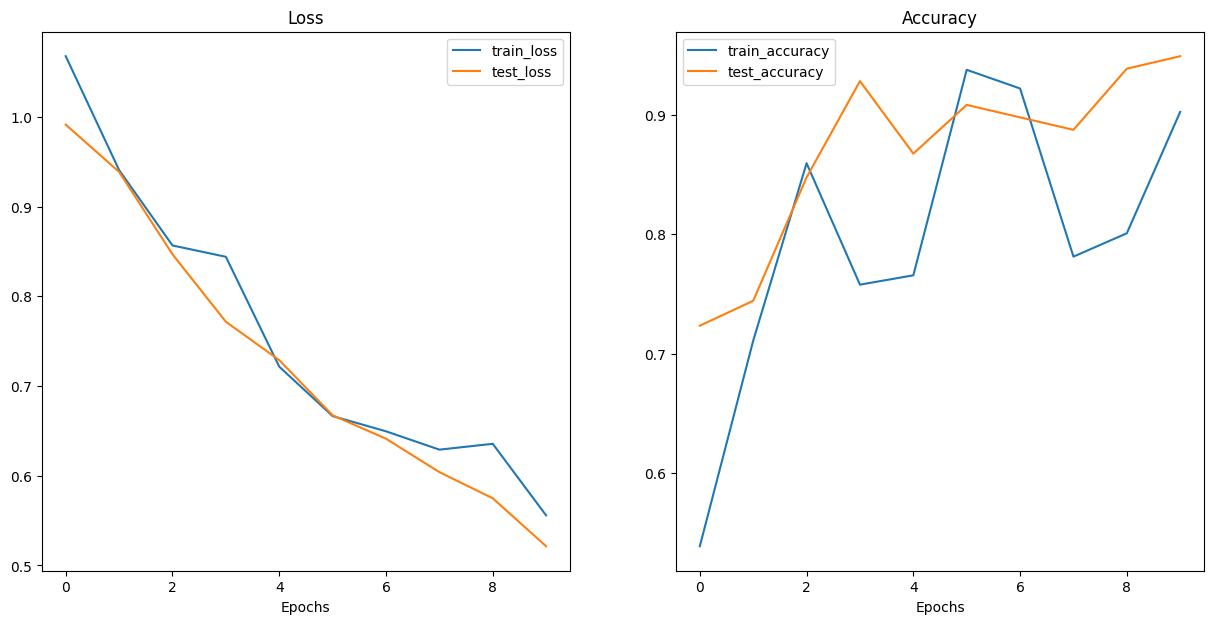

In [ ]:
# Plot the loss curves of our model
from helper_functions import plot_loss_curves
plot_loss_curves(results)


## 6. Make predictions on images from the test set

In [ ]:
class_names

['pizza', 'steak', 'sushi']

In [ ]:
from torchvision import transforms
from typing import Tuple, List
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path



def pred_plot_image(model:torch.nn.Module,
                    image_path:str,
                    class_names : List[str],
                    image_size:Tuple[int, int] =(224, 224),
                    transform : torchvision.transforms = None,
                    device:torch.device = device):
  #2.open image
  img = Image.open(image_path)

  #3. Create transforms
  if transform is not None:
    image_transform = transform
  else:
    image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

  #4. model on device
  model.to(device)

  #5.set model in evel mode
  model.eval()
  with torch.inference_mode():
    # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

    #7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))
      #print('target_image_pred', target_image_pred)

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
      target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
      #print('target_image_pred_probs', target_image_pred_probs)

    # 9. Convert prediction probabilities -> prediction labels
      target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
      plt.figure(figsize=(4,4))
      plt.imshow(img)
      plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
      plt.axis(False);



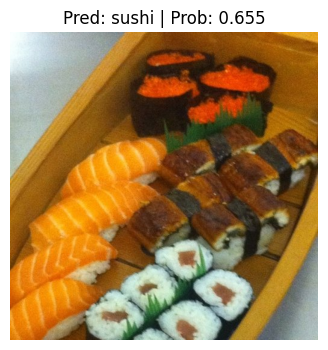

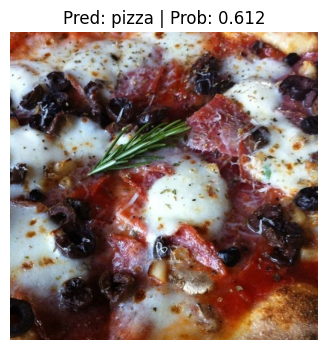

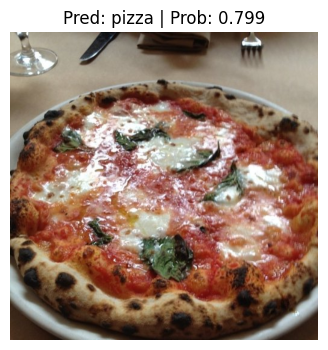

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_plot_image(model=model,
                    image_path=image_path,
                    class_names=class_names,
                    image_size=(224, 224),
                    transform = weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                    )

## 6.1 Making predictions on a custom image

In [ ]:
import requests
with open('pizza-dad.jpeg', 'wb') as f:
  req = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg')
  f.write(req.content)

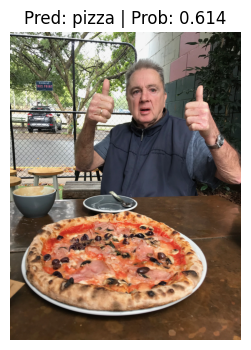

In [ ]:
# Setup custom image path
custom_image_path = '/content/pizza-dad.jpeg'

pred_plot_image(model=model,

                image_path=custom_image_path,
                class_names=class_names,
                image_size=(224, 224)
                )